# Shapely Collision Test

In [3]:
# Import shapely, numpy and matplotlib
from shapely.geometry import Point, Polygon
import numpy as np
import matplotlib.pyplot as plt

/home/agc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


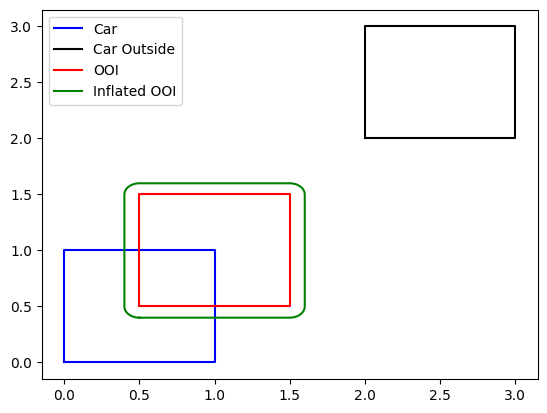

In [12]:
# Create a polygon to test with
car = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
car_outside = Polygon([(2, 2), (2, 3), (3, 3), (3, 2)])
ooi = Polygon([(0.5, 0.5), (0.5, 1.5), (1.5, 1.5), (1.5, 0.5)])
inflated_ooi = ooi.buffer(0.1)

# Draw on matplotlib
x, y = car.exterior.xy
plt.plot(x, y, color='blue', label='Car')
x, y = car_outside.exterior.xy
plt.plot(x, y, color='black', label='Car Outside')
x, y = ooi.exterior.xy
plt.plot(x, y, color='red', label='OOI')
x, y = inflated_ooi.exterior.xy
plt.plot(x, y, color='green', label='Inflated OOI')
plt.legend()


In [13]:
# Check if the car is inside the OOI and inflated OOI
print('Car is inside OOI:', car.overlaps(ooi))
print('Car is inside inflated OOI:', car.overlaps(inflated_ooi))
print('Car outside is inside OOI:', car_outside.overlaps(ooi))

Car is inside OOI: True
Car is inside inflated OOI: True
Car outside is inside OOI: False


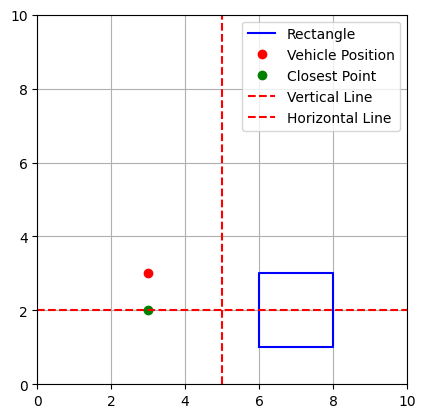

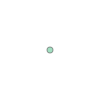

In [4]:
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
from shapely.affinity import rotate

# Define the vehicle's position as a point
vehicle_position = Point(3, 3)  # Example position (x, y)

# Define the rectangle (with bottom right corner)
rectangle = Polygon([(6, 1), (8, 1), (8, 3), (6, 3)])

# Define the lines (as LineString objects)
vertical_line = LineString([(5, 0), (5, 10)])
horizontal_line = LineString([(0, 2), (10, 2)])

# Find the closest points on the lines
closest_point_vertical_line = vertical_line.interpolate(vertical_line.project(vehicle_position))
closest_point_horizontal_line = horizontal_line.interpolate(horizontal_line.project(vehicle_position))

# Calculate distances
distance_to_vertical_line = vehicle_position.distance(closest_point_vertical_line)
distance_to_horizontal_line = vehicle_position.distance(closest_point_horizontal_line)

# Determine the closest point
if distance_to_vertical_line < distance_to_horizontal_line:
    closest_point = closest_point_vertical_line
else:
    closest_point = closest_point_horizontal_line

# Visualization
fig, ax = plt.subplots()
x, y = rectangle.exterior.xy
ax.plot(x, y, 'b-', label='Rectangle')
ax.plot(*vehicle_position.xy, 'ro', label='Vehicle Position')
ax.plot(*closest_point.xy, 'go', label='Closest Point')
ax.plot(*vertical_line.xy, 'r--', label='Vertical Line')
ax.plot(*horizontal_line.xy, 'r--', label='Horizontal Line')

ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal', 'box')
ax.grid(True)
plt.show()

closest_point


Obs Pt 1: 4.5, Obs Pt 2: 2.5
Obs Pt 1: POINT (-4.5 0), Obs Pt 2: POINT (2 3.5)
array('d', [-4.5]) array('d', [0.0]) array('d', [2.0]) array('d', [3.5])


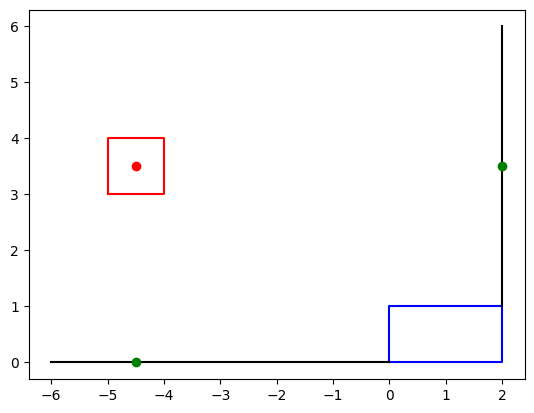

In [22]:
from shapely.geometry import LineString, Polygon
import matplotlib.pyplot as plt
import numpy as np

ooi = Polygon([(0, 0), (0, 1), (2, 1), (2, 0)])
car = Polygon([(-5, 3), (-5, 4), (-4, 4), (-4, 3)])
car_center = car.centroid

obs_line1 = LineString([(0, 0), (-6, 0)])
obs_line2 = LineString([(2, 1), (2, 6)])

obs_len1 = obs_line1.project(car_center)
obs_len2 = obs_line2.project(car_center)

print(f'Obs Pt 1: {obs_len1}, Obs Pt 2: {obs_len2}')

obs_pt1 = obs_line1.interpolate(obs_len1)
obs_pt2 = obs_line2.interpolate(obs_len2)

print(f'Obs Pt 1: {obs_pt1}, Obs Pt 2: {obs_pt2}')

print(*obs_pt1.xy, *obs_pt2.xy)

# Plot the OOI
plt.plot(*ooi.exterior.xy, color='blue', label='OOI')
plt.plot(*car.exterior.xy, color='red', label='Car')
plt.plot(*obs_line1.xy, color='black', label='Obs Line 1')
plt.plot(*obs_line2.xy, color='black', label='Obs Line 2')
plt.plot(*car_center.xy, 'ro', label='Car Center')
plt.plot(*obs_pt1.xy, 'go', label='Obs Pt 1')
plt.plot(*obs_pt2.xy, 'go', label='Obs Pt 2')


Line of sight intersects OOI: False


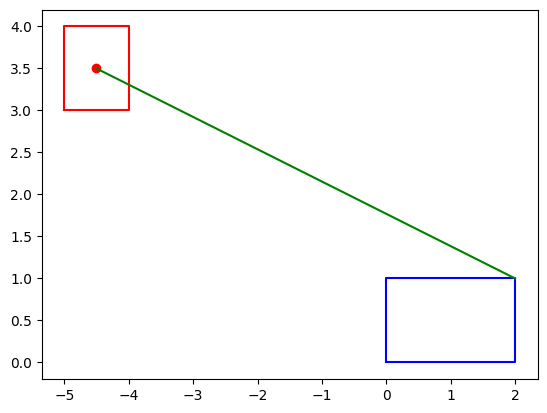

In [8]:
from shapely.geometry import LineString, Polygon
import matplotlib.pyplot as plt
import numpy as np

ooi = Polygon([(0, 0), (0, 1), (2, 1), (2, 0)])
car = Polygon([(-5, 3), (-5, 4), (-4, 4), (-4, 3)])
car_center = car.centroid

line_of_sight = LineString([car_center, (2,1)])

intersects = line_of_sight.crosses(ooi)
print(f'Line of sight intersects OOI: {intersects}')

# Plot the OOI
plt.plot(*ooi.exterior.xy, color='blue', label='OOI')
plt.plot(*car.exterior.xy, color='red', label='Car')
plt.plot(*car_center.xy, 'ro', label='Car Center')
plt.plot(*line_of_sight.xy, color='green', label='Line of Sight')

Line of sight to corner (0.0, 0.0) intersects OOI: False
Line of sight to corner (0.0, 1.0) intersects OOI: False
Line of sight to corner (2.0, 1.0) intersects OOI: False
Line of sight to corner (2.0, 0.0) intersects OOI: True


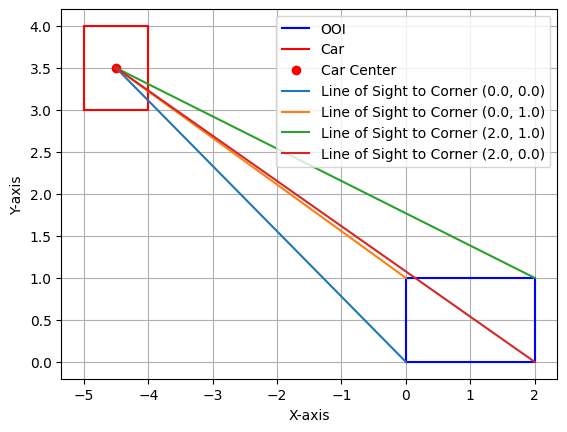

In [9]:
from shapely.geometry import LineString, Polygon, Point
import matplotlib.pyplot as plt

# Define the object of interest (OOI) and the car
ooi = Polygon([(0, 0), (0, 1), (2, 1), (2, 0)])
car = Polygon([(-5, 3), (-5, 4), (-4, 4), (-4, 3)])
car_center = car.centroid

# Get the coordinates of the corners of the OOI
ooi_corners = list(ooi.exterior.coords)[:-1]  # Exclude the repeated first/last point

# Create line of sight from the car center to each corner of the OOI
lines_of_sight = [LineString([car_center, Point(corner)]) for corner in ooi_corners]

# Check if each line of sight intersects with the OOI
intersections = [line.crosses(ooi) for line in lines_of_sight]

# Print results
for i, corner in enumerate(ooi_corners):
    print(f'Line of sight to corner {corner} intersects OOI: {intersections[i]}')

# Plot the OOI, car, and lines of sight
plt.plot(*ooi.exterior.xy, color='blue', label='OOI')
plt.plot(*car.exterior.xy, color='red', label='Car')
plt.plot(*car_center.xy, 'ro', label='Car Center')

# Plot each line of sight
for i, line in enumerate(lines_of_sight):
    plt.plot(*line.xy, label=f'Line of Sight to Corner {ooi_corners[i]}')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()
